In [1]:
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt

In [2]:
# List of maqam files
files = [
    "Dataset/Mujawwad1_(hop=5)/Bayati/Bayati_000.wav",
    "Dataset/Mujawwad1_(hop=5)/Hijaz/Hijaz_000.wav",
    "Dataset/Mujawwad1_(hop=5)/Jiharkah/Jiharkah_000.wav",
    "Dataset/Mujawwad1_(hop=5)/Nahawand/Nahawand_000.wav",
    "Dataset/Mujawwad1_(hop=5)/Rast/Rast_000.wav",
    "Dataset/Mujawwad1_(hop=5)/Saba/Saba_000.wav",
    "Dataset/Mujawwad1_(hop=5)/Sikah/Sikah_000.wav"
]

sample_rate = 44100

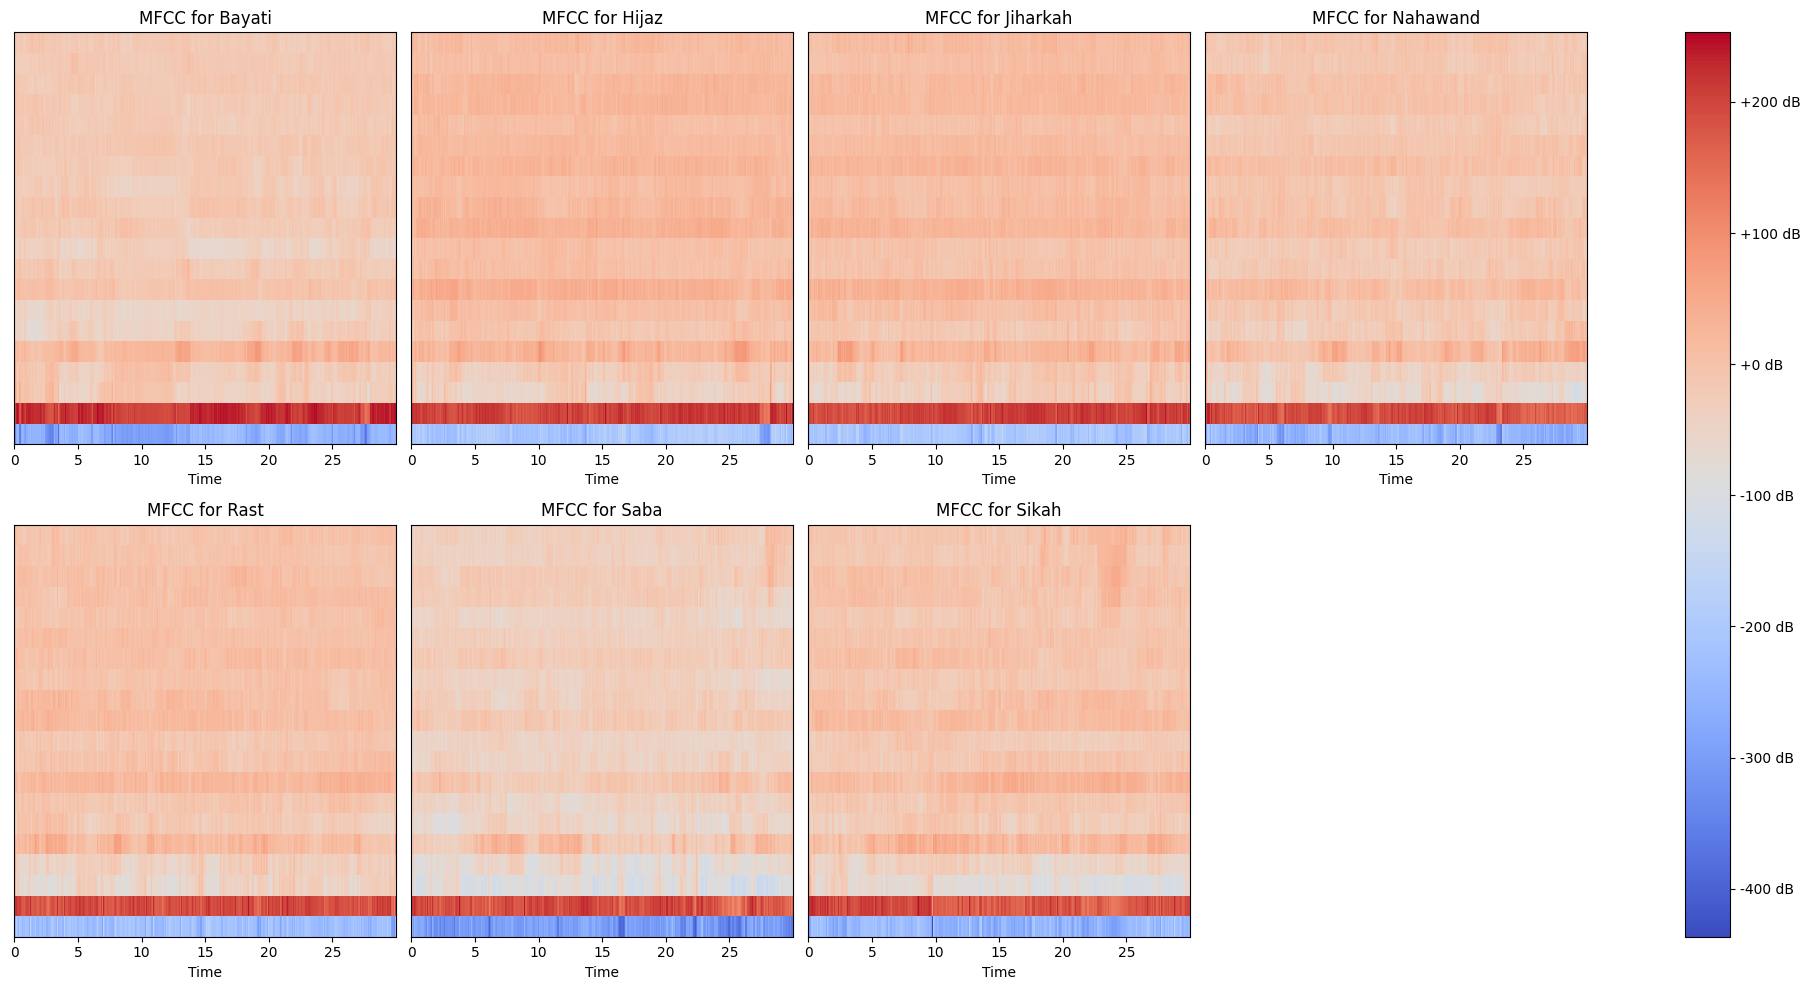

In [86]:
# Create a figure with 3 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, file_name in enumerate(files):
    # Load the audio file
    y, sr = librosa.load(file_name, sr=sample_rate)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Get the appropriate subplot axes
    ax = axes[i // 4, i % 4]
    
    # Display the MFCC spectrogram
    img = librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=ax)
    ax.set_title(f'MFCC for {file_name.split("/")[2]}')

# Remove the empty subplot (bottom right corner)
fig.delaxes(axes[1, 3])

# Adjust layout and add colorbar
fig.tight_layout()
fig.colorbar(img, ax=axes.ravel().tolist(), format="%+2.0f dB")
plt.show()

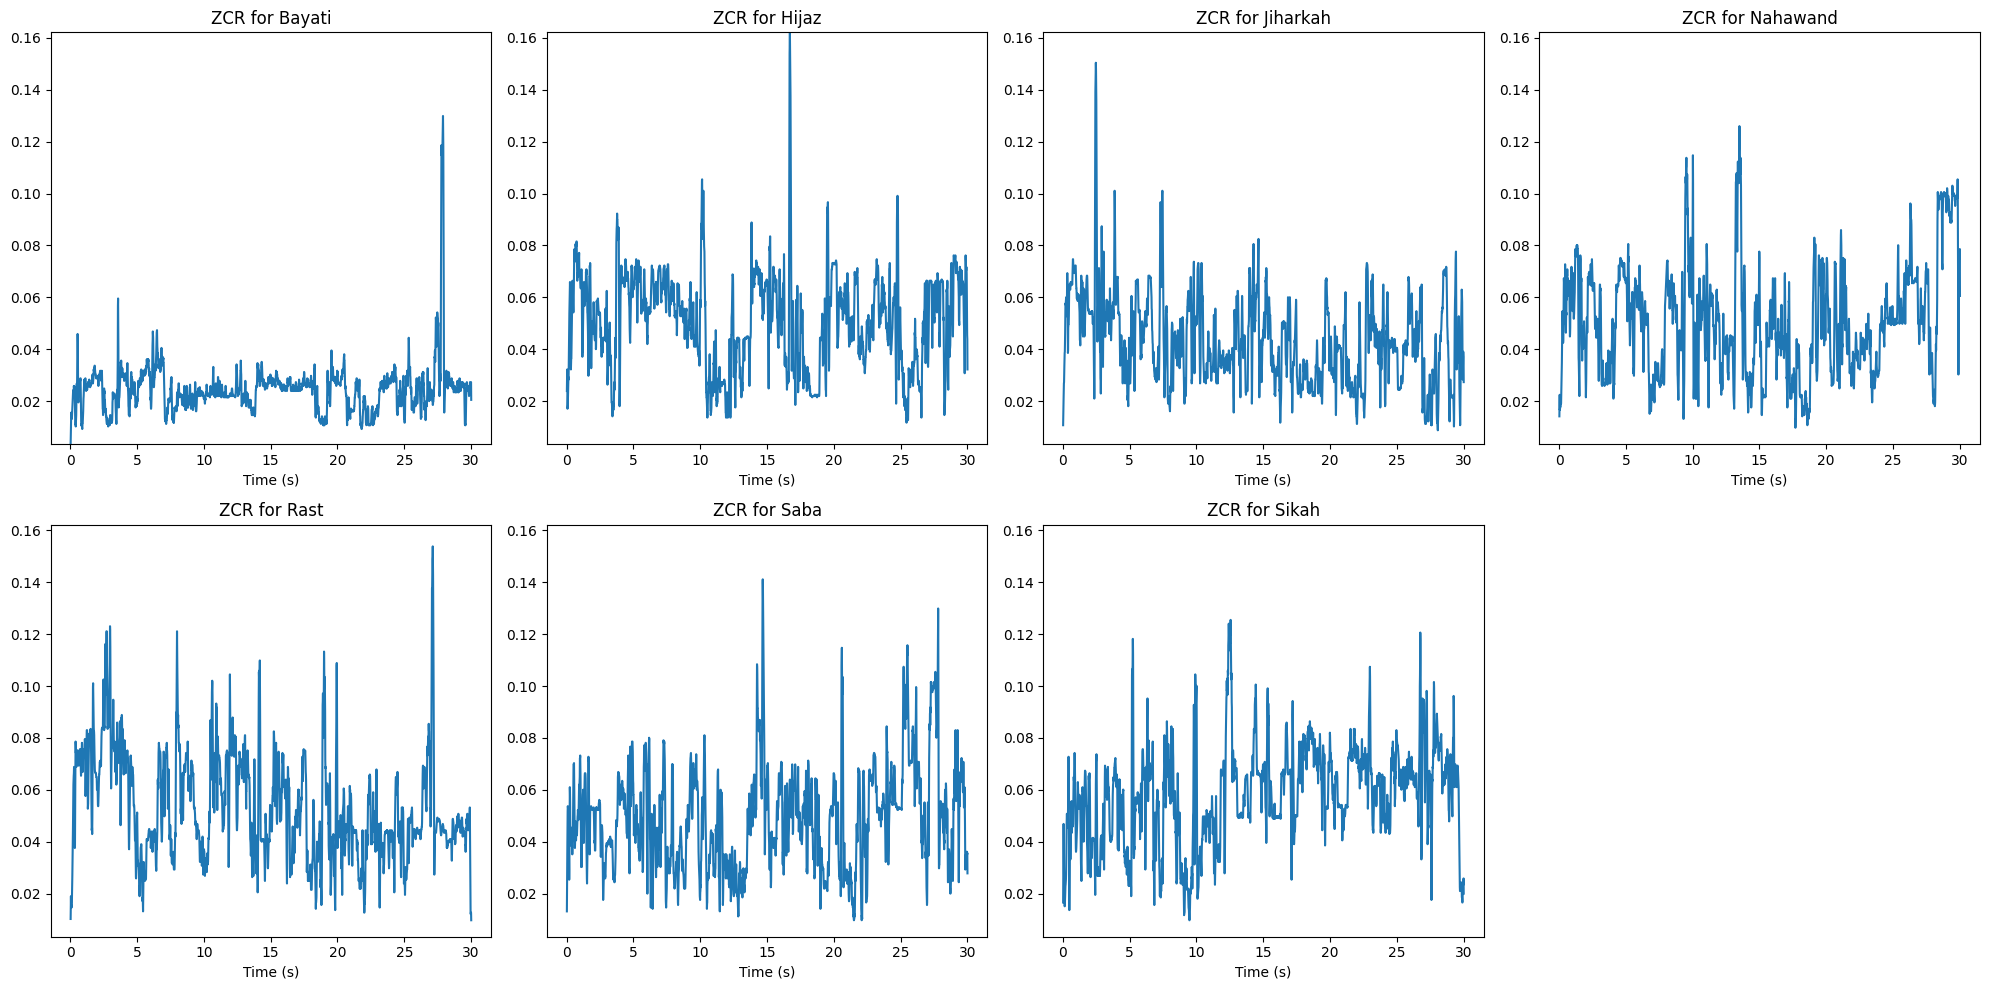

In [80]:
# Initialize lists to hold the RMS values for all files
all_zcrs = []

# First pass to compute the global min and max RMS values
for file_name in files:
    y, sr = librosa.load(file_name, sr=sample_rate)
    zcrs = librosa.feature.zero_crossing_rate(y)[0]
    all_zcrs.append(zcrs)

# Compute the global min and max RMS values
global_min = min([zcr.min() for zcr in all_zcrs])
global_max = max([zcr.max() for zcr in all_zcrs])

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Second pass to plot the RMS values with consistent y-axis limits
for i, file_name in enumerate(files):
    # Load the audio file
    y, sr = librosa.load(file_name, sr=sample_rate)
    zcrs = librosa.feature.zero_crossing_rate(y)[0]
    frames = range(len(zcrs))
    t = librosa.frames_to_time(frames, sr=sr, n_fft=2048, hop_length=512)

    # Get the appropriate subplot axes
    ax = axes[i // 4, i % 4]
    
    # Plot the RMS
    ax.plot(t, zcrs)
    ax.set_ylim(global_min, global_max)
    ax.set_title(f'ZCR for {file_name.split("/")[2]}')
    ax.set_xlabel('Time (s)')

# Remove the empty subplot (bottom right corner)
fig.delaxes(axes[1, 3])

# Adjust layout and show
fig.tight_layout()
plt.show()

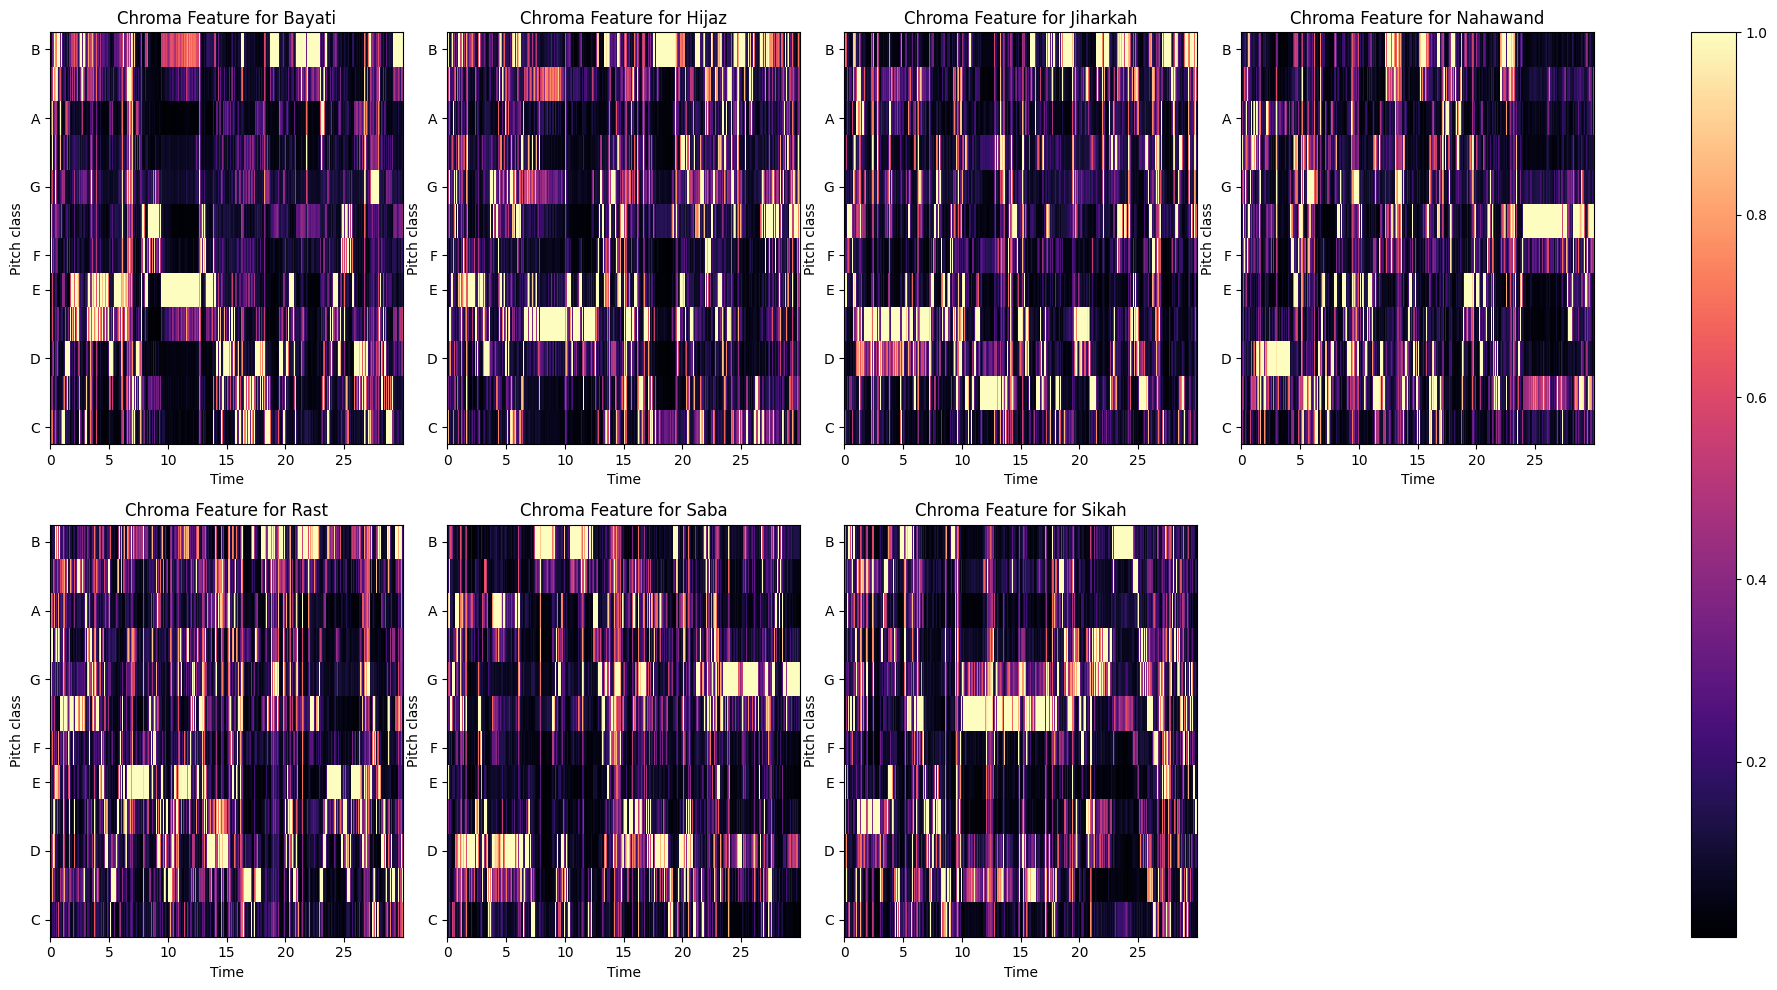

In [4]:
# Create a figure with 3 rows and 3 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, file_name in enumerate(files):
    # Load the audio file
    y, sr = librosa.load(file_name, sr=sample_rate)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=24)

    # Get the appropriate subplot axes
    ax = axes[i // 4, i % 4]
    
    # Display the MFCC spectrogram
    img = librosa.display.specshow(chroma, sr=sr, y_axis='chroma', x_axis='time', ax=ax)
    ax.set_title(f'Chroma Feature for {file_name.split("/")[2]}')

# Remove the empty subplot (bottom right corner)
fig.delaxes(axes[1, 3])

# Adjust layout and add colorbar
fig.tight_layout()
fig.colorbar(img, ax=axes.ravel().tolist())
plt.show()

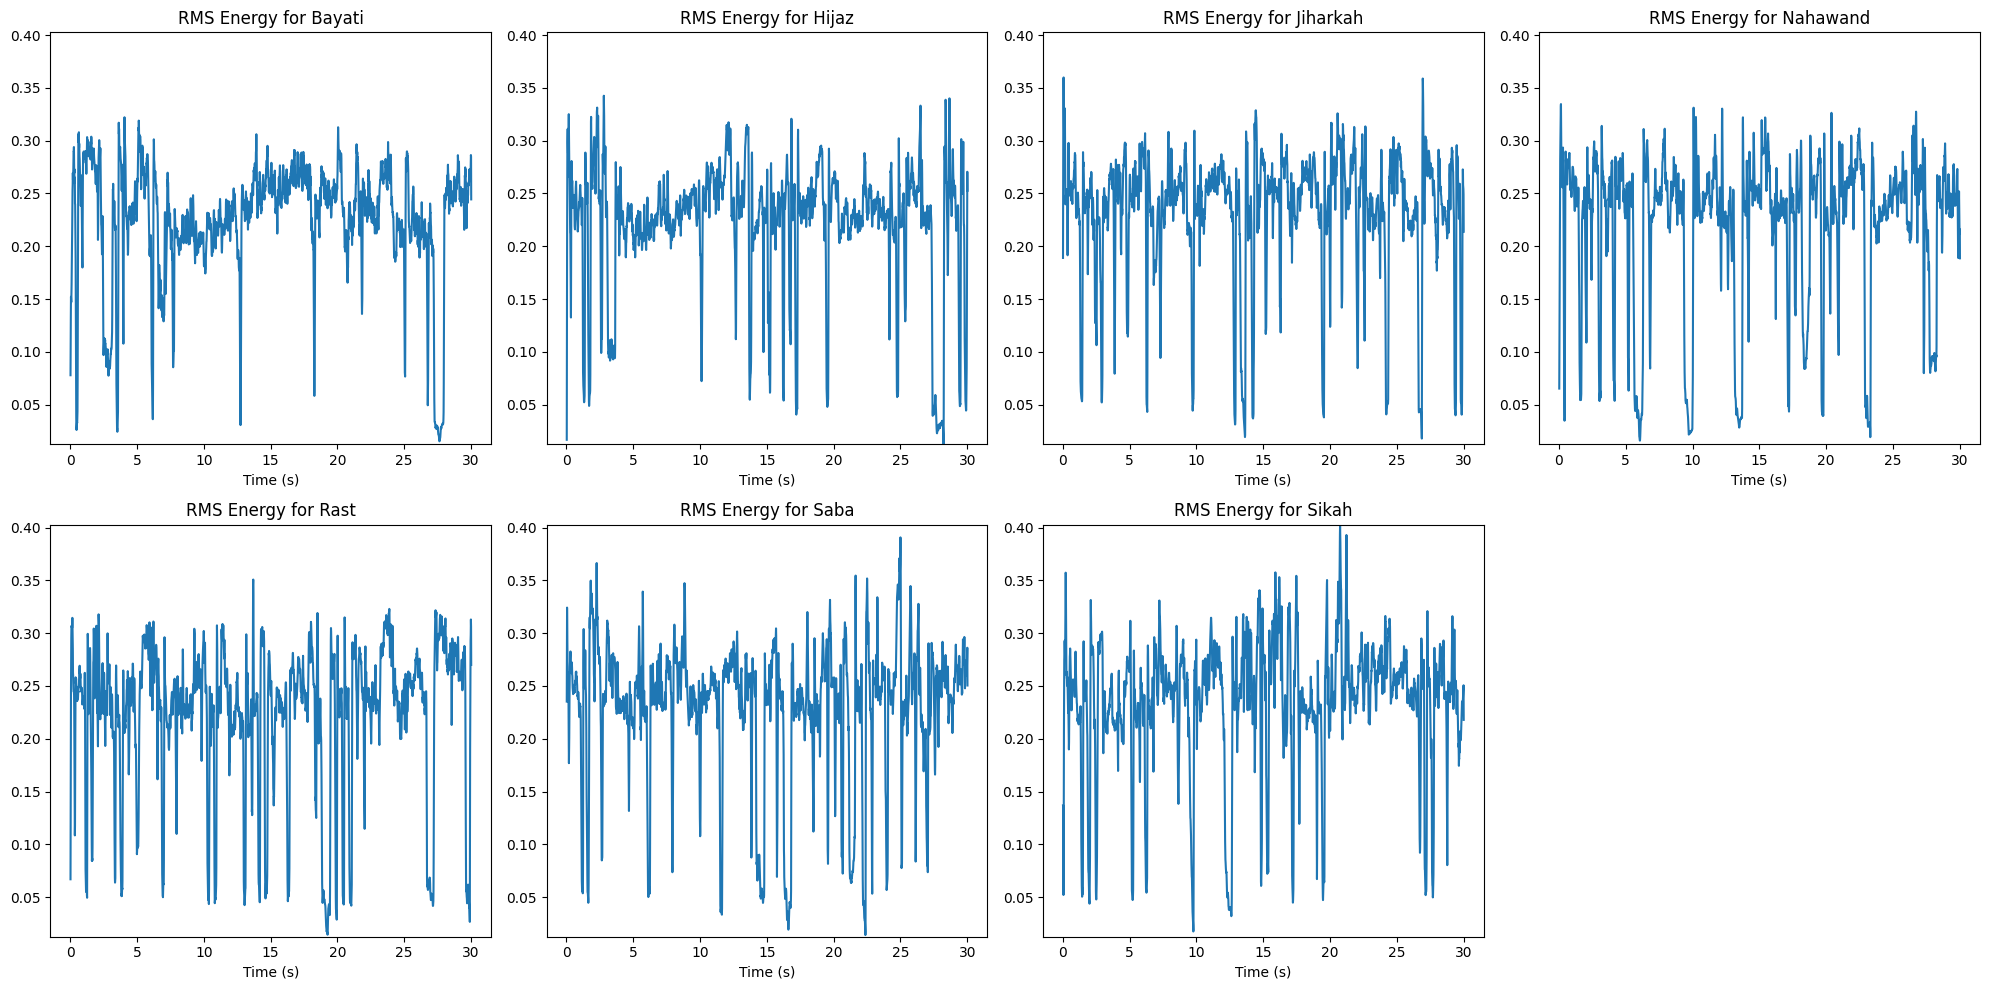

In [5]:
# Initialize lists to hold the RMS values for all files
all_rms = []

# First pass to compute the global min and max RMS values
for file_name in files:
    y, sr = librosa.load(file_name, sr=sample_rate)
    rms = librosa.feature.rms(y=y)[0]
    all_rms.append(rms)

# Compute the global min and max RMS values
global_min = min([rms.min() for rms in all_rms])
global_max = max([rms.max() for rms in all_rms])

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Second pass to plot the RMS values with consistent y-axis limits
for i, file_name in enumerate(files):
    # Load the audio file
    y, sr = librosa.load(file_name, sr=sample_rate)
    rms = librosa.feature.rms(y=y)[0]
    frames = range(len(rms))
    t = librosa.frames_to_time(frames, sr=sr, n_fft=2048, hop_length=512)

    # Get the appropriate subplot axes
    ax = axes[i // 4, i % 4]
    
    # Plot the RMS
    ax.plot(t, rms)
    ax.set_ylim(global_min, global_max)
    ax.set_title(f'RMS Energy for {file_name.split("/")[2]}')
    ax.set_xlabel('Time (s)')

# Remove the empty subplot (bottom right corner)
fig.delaxes(axes[1, 3])

# Adjust layout and show
fig.tight_layout()
plt.show()

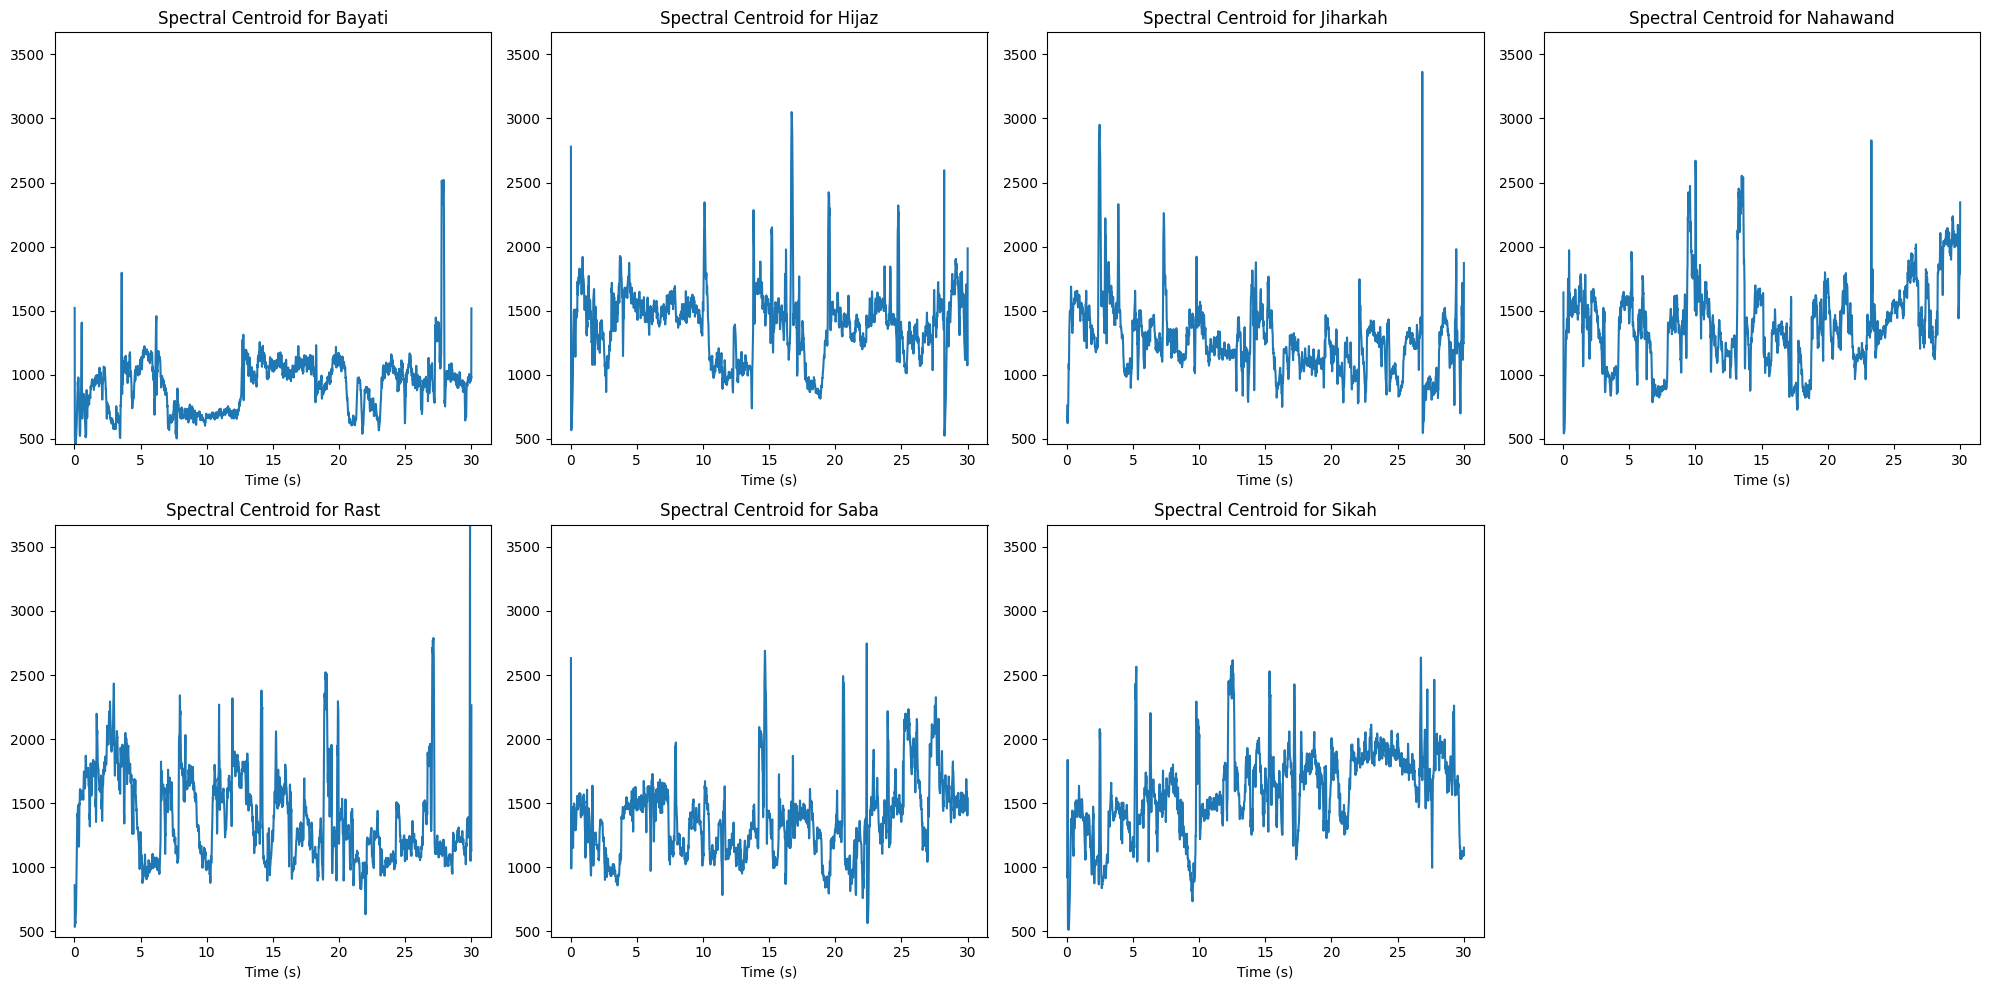

In [81]:
# Initialize lists to hold the RMS values for all files
all_cent = []

# First pass to compute the global min and max RMS values
for file_name in files:
    y, sr = librosa.load(file_name, sr=sample_rate)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    all_cent.append(cent)

# Compute the global min and max RMS values
global_min = min([cent.min() for cent in all_cent])
global_max = max([cent.max() for cent in all_cent])

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Second pass to plot the RMS values with consistent y-axis limits
for i, file_name in enumerate(files):
    # Load the audio file
    y, sr = librosa.load(file_name, sr=sample_rate)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    frames = range(len(cent))
    t = librosa.frames_to_time(frames, sr=sr, n_fft=2048, hop_length=512)

    # Get the appropriate subplot axes
    ax = axes[i // 4, i % 4]
    
    # Plot the RMS
    ax.plot(t, cent)
    ax.set_ylim(global_min, global_max)
    ax.set_title(f'Spectral Centroid for {file_name.split("/")[2]}')
    ax.set_xlabel('Time (s)')

# Remove the empty subplot (bottom right corner)
fig.delaxes(axes[1, 3])

# Adjust layout and show
fig.tight_layout()
plt.show()

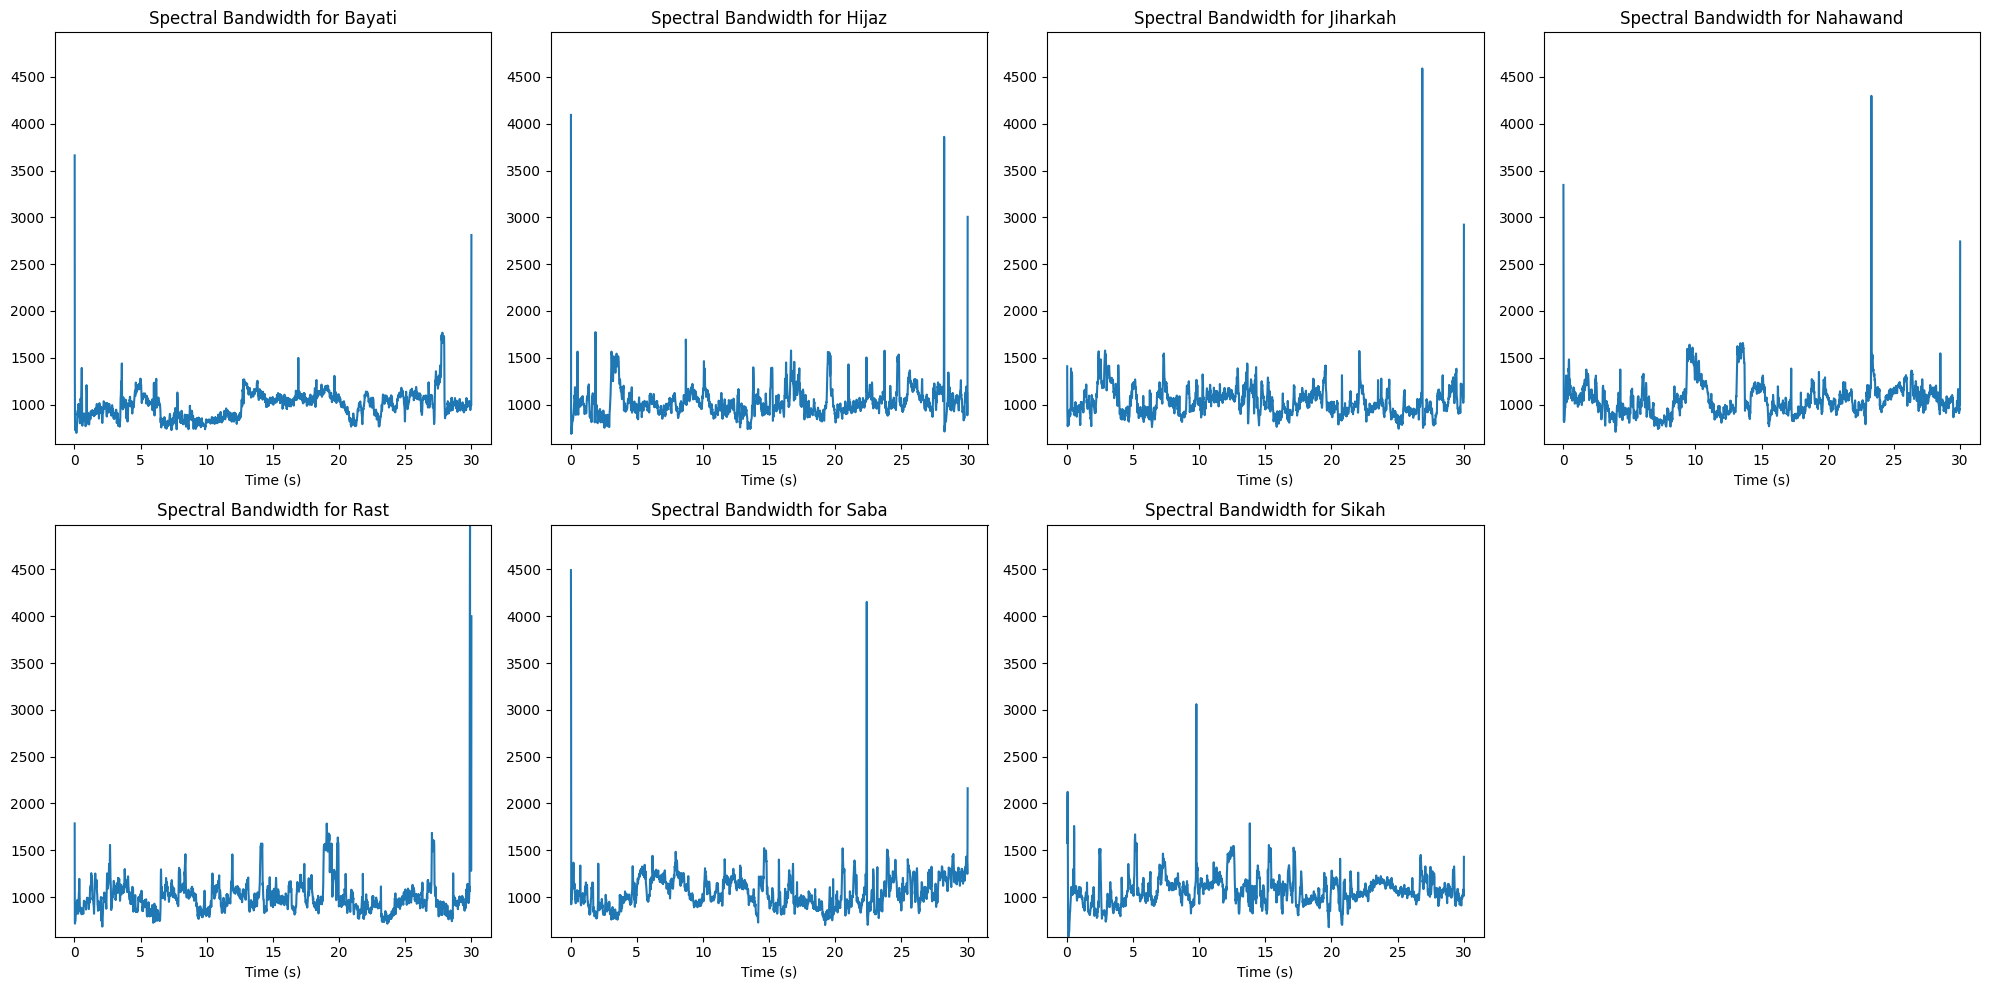

In [88]:
# Initialize lists to hold the RMS values for all files
all_bandwidth = []

# First pass to compute the global min and max RMS values
for file_name in files:
    y, sr = librosa.load(file_name, sr=sample_rate)
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    all_bandwidth.append(bandwidth)

# Compute the global min and max RMS values
global_min = min([bandwidth.min() for bandwidth in all_bandwidth])
global_max = max([bandwidth.max() for bandwidth in all_bandwidth])

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Second pass to plot the RMS values with consistent y-axis limits
for i, file_name in enumerate(files):
    # Load the audio file
    y, sr = librosa.load(file_name, sr=sample_rate)
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    frames = range(len(bandwidth))
    t = librosa.frames_to_time(frames, sr=sr, n_fft=2048, hop_length=512)

    # Get the appropriate subplot axes
    ax = axes[i // 4, i % 4]
    
    # Plot the RMS
    ax.plot(t, bandwidth)
    ax.set_ylim(global_min, global_max)
    ax.set_title(f'Spectral Bandwidth for {file_name.split("/")[2]}')
    ax.set_xlabel('Time (s)')

# Remove the empty subplot (bottom right corner)
fig.delaxes(axes[1, 3])

# Adjust layout and show
fig.tight_layout()
plt.show()

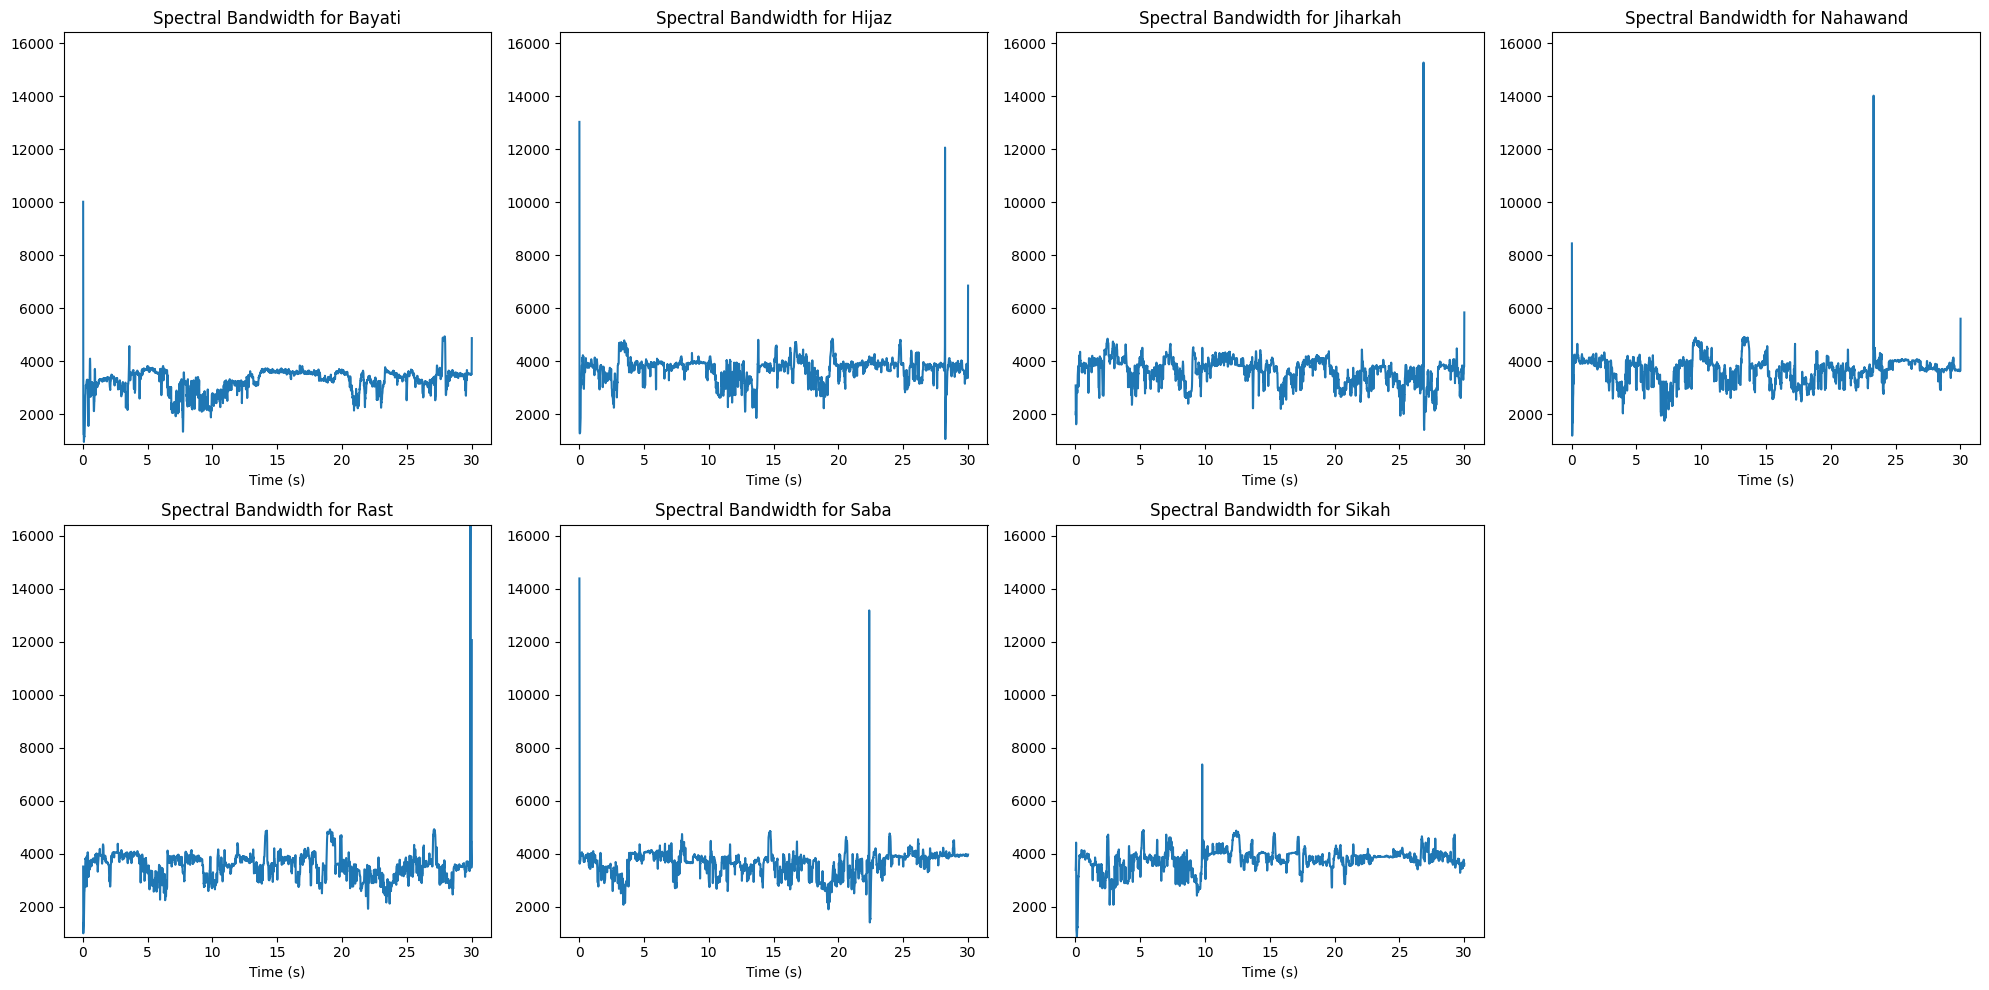

In [89]:
# Initialize lists to hold the RMS values for all files
all_rolloff = []

# First pass to compute the global min and max RMS values
for file_name in files:
    y, sr = librosa.load(file_name, sr=sample_rate)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.95)[0]
    all_rolloff.append(rolloff)

# Compute the global min and max RMS values
global_min = min([rolloff.min() for rolloff in all_rolloff])
global_max = max([rolloff.max() for rolloff in all_rolloff])

# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Second pass to plot the RMS values with consistent y-axis limits
for i, file_name in enumerate(files):
    # Load the audio file
    y, sr = librosa.load(file_name, sr=sample_rate)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.95)[0]
    frames = range(len(rolloff))
    t = librosa.frames_to_time(frames, sr=sr, n_fft=2048, hop_length=512)

    # Get the appropriate subplot axes
    ax = axes[i // 4, i % 4]
    
    # Plot the RMS
    ax.plot(t, rolloff)
    ax.set_ylim(global_min, global_max)
    ax.set_title(f'Spectral Roll-Off for {file_name.split("/")[2]}')
    ax.set_xlabel('Time (s)')

# Remove the empty subplot (bottom right corner)
fig.delaxes(axes[1, 3])

# Adjust layout and show
fig.tight_layout()
plt.show()